In [1]:
import re

import parse
import pdfplumber
import pandas as pd
from collections import namedtuple

In [4]:
with pdfplumber.open("data/raw/sample.pdf") as pdf:
    pages = pdf.pages
    for page in pdf.pages:
        text = page.extract_text()
        for line in text.split('\n'):
            print(line)
           

Ovarian Stimulation sample
Name : Amira L
Protocol : Flex Antago
Birth date: 27/11/95
AMH : 3.64
AFC :
Cycle number : 2nd
Monitoring table :
Anta End
J Date Ménopur E2 LH Pg Right Ovary Left Ovary
Ago o
J 225UI
2/10/25
1
J
//
2
J
//
3
J
//
4
J 3.5
6/10 // 350 11 / 10.5 / 10 11. 5 / 9
5 1
J
//
6
J
// /
7
J
9/10 // / 943 2*14 / 13 / 8 13 / 14 10.7
8
J
// /
9
J
1 // /
0
J
17.5 / 16.5 / 19 / 15 / 14
1 12/10 // / 9.8
16 / 14 / 13 / 12
1
J
Ovitrelle
1 13/10
2
J
1
3
J
1
4
J
1
5
J
1
6
J
1
7
J
1
8
J
1
9
J
2
0
Number Of follicles = 9
The patient has an optimal-response


In [2]:
import pandas as pd

In [3]:
main_df = pd.read_csv("data/raw/patients.csv")

In [4]:
main_df['Age'].median()

np.float64(32.0)

In [5]:
main_df['Age'].mean()

np.float64(31.738866396761132)

In [7]:
main_df['n_Follicles'].mean()

np.float64(16.56745182012848)

In [8]:
main_df['n_Follicles'].median()

np.float64(15.0)

In [9]:
main_df[main_df['n_Follicles']>10]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response
0,Carla F,1,37.0,flexible antagonist,1.87,16.0,930.13,NaN,high
3,Hend I,1,24.0,flex anta,1.81,18.0,351.81,17.0,optimal
5,Hind O,1,42.0,fixed anta,4.36,24.0,3971.00,9.0,optimal
6,Lilia S,3,30.0,agonist,5.31,30.0,3638.00,NaN,high
7,Nawal F,3,36.0,flexible antagonist,2.73,26.0,541.02,NaN,optimal
...,...,...,...,...,...,...,...,...,...
492,Lilia C,1,24.0,fixed antagonist,1.63,13.0,795.57,8.0,low
493,Soumaya B,2,26.0,flex anta,2.22,21.0,683.31,16.0,optimal
496,Majida Y,1,31.0,agoni,2.79,23.0,NaN,NaN,optimal
497,Batoul B,1,35.0,flex anta,2.77,16.0,690.96,9.0,optimal


--- Average Metrics by Follicle Group ---
                      Age       AMH  n_Follicles      E2_day5
Follicle_Group                                               
Low (<=18)      32.218978  1.409793     9.351254  1193.346846
Medium (19-24)  31.114943  3.012785    21.551724  1334.185385
High (>24)      30.811881  4.404000    32.207921  1072.401771


C:\Users\maata\AppData\Local\Temp\ipykernel_20372\4201015743.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
C:\Users\maata\AppData\Local\Temp\ipykernel_20372\4201015743.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Follicle_Group', y='AMH', data=df, ax=axes[0, 0], palette="Blues")
C:\Users\maata\AppData\Local\Temp\ipykernel_20372\4201015743.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fol

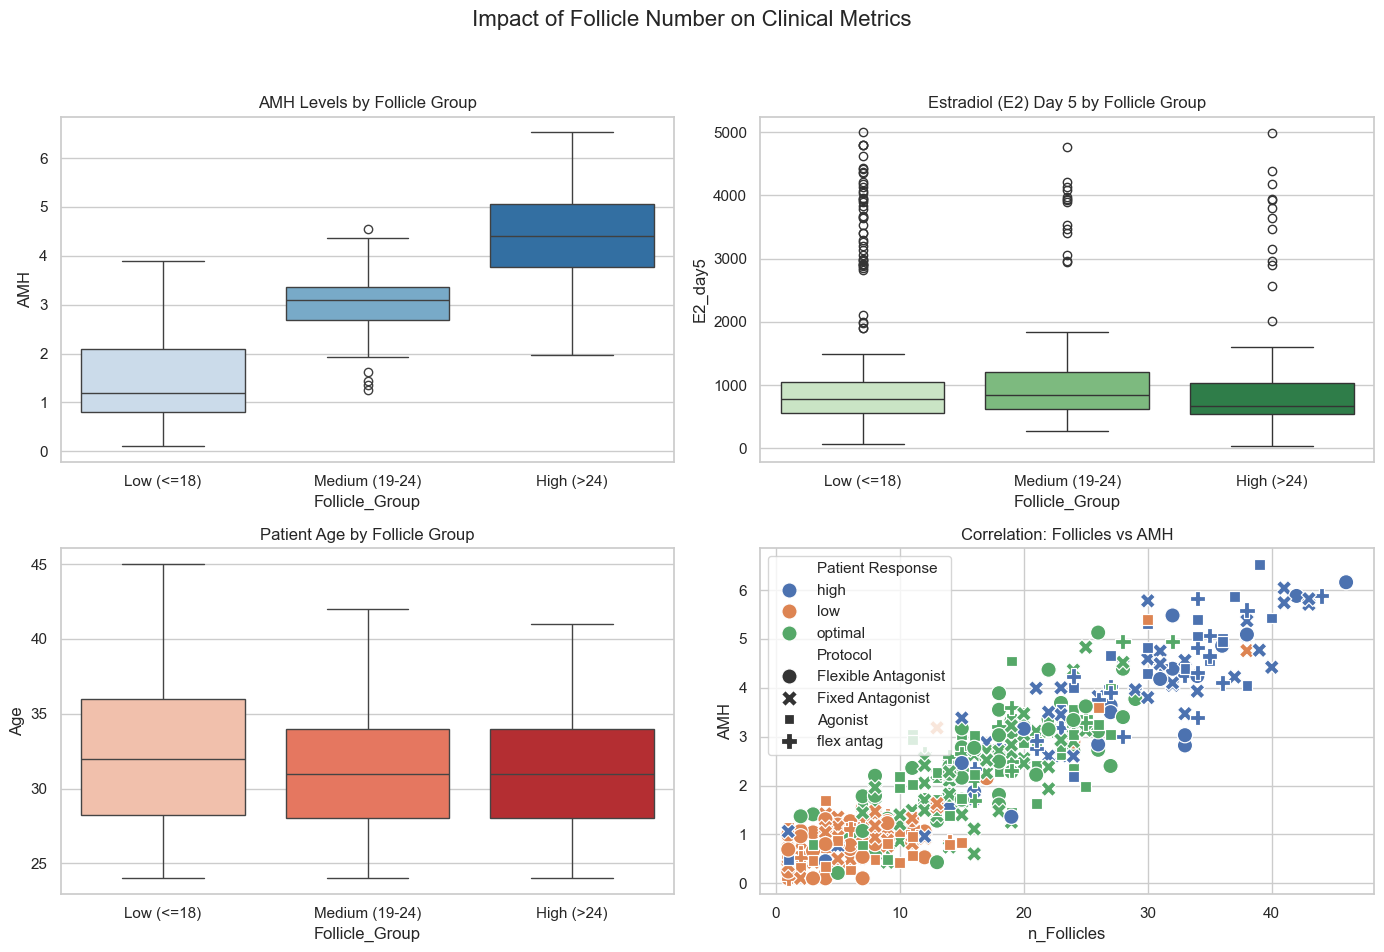

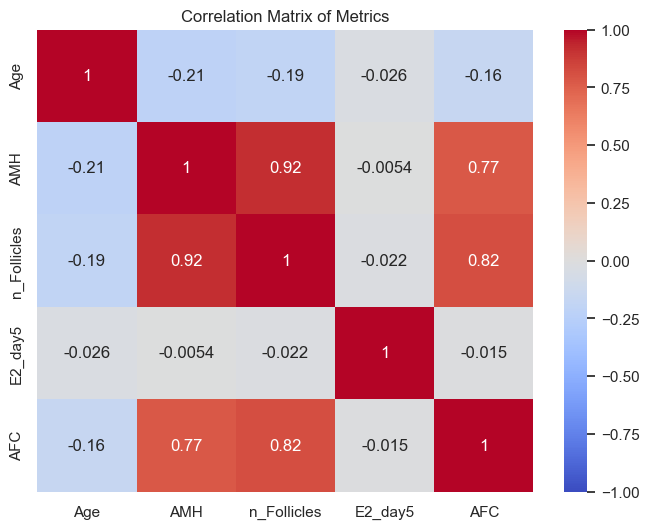

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data from CSV
# Replace 'your_data_file.csv' with the actual name of your file
file_path = 'data/raw/patients.csv' 
df = pd.read_csv(file_path)

# 2. Data Cleaning
# Standardize Protocol names to fix variations like "flex anta", "agoni", etc.
protocol_map = {
    'flexible antagonist': 'Flexible Antagonist',
    'flex anta': 'Flexible Antagonist',
    'fixed antagonist': 'Fixed Antagonist',
    'fixed anta': 'Fixed Antagonist',
    'fix antag': 'Fixed Antagonist',
    'agonist': 'Agonist',
    'agoni': 'Agonist'
}

# Apply the mapping if the 'Protocol' column exists
if 'Protocol' in df.columns:
    df['Protocol'] = df['Protocol'].astype(str).str.lower().map(protocol_map).fillna(df['Protocol'])
    # Note: The map above expects lowercase keys. 
    # If your CSV has clean names already, you might not need this.
    # A more robust way using replace for substrings or specific values:
    df['Protocol'] = df['Protocol'].replace(protocol_map)

# Fix typos in Response (e.g., "optima" -> "optimal")
if 'Patient Response' in df.columns:
    df['Patient Response'] = df['Patient Response'].replace({'optima': 'optimal'})

# Ensure numeric columns are actually numeric (coercing errors to NaN)
numeric_cols = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Create Groups based on n_Follicles
# We define 3 groups: Low (<=18), Medium (19-24), High (>24)
# You can adjust the bins=[0, 18, 24, 100] to change the cut-off points.
if 'n_Follicles' in df.columns:
    df['Follicle_Group'] = pd.cut(
        df['n_Follicles'], 
        bins=[0, 18, 24, 1000], 
        labels=['Low (<=18)', 'Medium (19-24)', 'High (>24)']
    )

    # Print Summary
    print("--- Average Metrics by Follicle Group ---")
    summary = df.groupby('Follicle_Group')[['Age', 'AMH', 'n_Follicles', 'E2_day5']].mean()
    print(summary)
else:
    print("Error: 'n_Follicles' column not found in CSV.")

# 4. Generate Plots
# We check if required columns exist before plotting to avoid errors
required_cols = ['AMH', 'E2_day5', 'Age', 'n_Follicles', 'Follicle_Group']
if all(col in df.columns for col in required_cols):
    
    # Set plot style
    sns.set(style="whitegrid")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Impact of Follicle Number on Clinical Metrics', fontsize=16)

    # Plot A: Boxplot of AMH
    sns.boxplot(x='Follicle_Group', y='AMH', data=df, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title('AMH Levels by Follicle Group')

    # Plot B: Boxplot of E2
    sns.boxplot(x='Follicle_Group', y='E2_day5', data=df, ax=axes[0, 1], palette="Greens")
    axes[0, 1].set_title('Estradiol (E2) Day 5 by Follicle Group')

    # Plot C: Boxplot of Age
    sns.boxplot(x='Follicle_Group', y='Age', data=df, ax=axes[1, 0], palette="Reds")
    axes[1, 0].set_title('Patient Age by Follicle Group')

    # Plot D: Scatter Plot (Follicles vs AMH)
    # We map 'Protocol' to shapes and 'Patient Response' to colors if they exist
    hue_col = 'Patient Response' if 'Patient Response' in df.columns else None
    style_col = 'Protocol' if 'Protocol' in df.columns else None
    
    sns.scatterplot(
        x='n_Follicles', 
        y='AMH', 
        hue=hue_col, 
        style=style_col, 
        s=120, 
        data=df, 
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Correlation: Follicles vs AMH')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 5. Correlation Matrix
    plt.figure(figsize=(8, 6))
    # Select only the numeric columns present in the dataframe
    valid_numeric_cols = [c for c in numeric_cols if c in df.columns]
    corr = df[valid_numeric_cols].corr()
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Metrics')
    plt.show()

else:
    print("Some required columns for plotting are missing.")

In [11]:
def standardize_protocol(value):
    s = str(value).lower()
    if 'flex' in s: return 'Flexible Antagonist'
    if 'fix' in s:  return 'Fixed Antagonist'
    if 'ago' in s:  return 'Agonist'
    return 'Unknown' # or return value to keep original

In [13]:
main_df['Protocol'] = main_df['Protocol'].apply(standardize_protocol)

# Check unique values to make sure it worked
print(main_df['Protocol'].value_counts())

Protocol
Flexible Antagonist    221
Fixed Antagonist       160
Agonist                119
Name: count, dtype: int64


In [32]:
main_df = pd.read_csv("data/processed/clean_dataset.csv")

In [33]:
main_df ['Patient Response'].unique()

array(['high', 'low', 'optimal'], dtype=object)

In [34]:
main_df.duplicated().sum()

np.int64(0)

In [35]:
main_df[main_df.duplicated()]

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response


In [36]:
def remove_duplicate_rows(df, subset_cols=None):
    """
    Removes duplicate rows from a DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        subset_cols (list): Optional. A list of column names to check for duplicates 
                            (e.g., ['patient_id', 'cycle_number']). 
                            If None, checks all columns.
                            
    Returns:
        pd.DataFrame: A new DataFrame with duplicates removed.
    """
    # 1. Count original rows
    original_count = len(df)
    
    # 2. Drop duplicates
    # keep='first' keeps the first occurrence and deletes the rest
    clean_df = df.drop_duplicates(subset=subset_cols, keep='first')
    
    # 3. Calculate how many were removed
    removed_count = original_count - len(clean_df)
    
    # 4. Feedback
    if removed_count > 0:
        print(f"⚠️  Removed {removed_count} duplicate row(s).")
    else:
        print("✅ No duplicate rows found.")
        
    return clean_df

In [37]:
remove_duplicate_rows(main_df, subset_cols=None)

✅ No duplicate rows found.


,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response
0,Carla F,1,37.0,Flexible Antagonist,1.87,16.0,930.13,NaN,high
1,Farah Y,2,24.0,Fixed Antagonist,1.18,5.0,1974.21,NaN,low
2,Ebtisam A,1,32.0,Fixed Antagonist,1.35,5.0,846.31,NaN,low
3,Hend I,1,24.0,Flexible Antagonist,1.81,18.0,351.81,17.0,optimal
4,Samira K,2,24.0,Flexible Antagonist,1.04,9.0,606.70,8.0,low
...,...,...,...,...,...,...,...,...,...
497,Batoul B,1,35.0,Flexible Antagonist,2.77,16.0,690.96,9.0,optimal
498,Deema K,1,29.0,Agonist,0.78,7.0,2822.00,NaN,optimal
499,Rihab B,2,28.0,Fixed Antagonist,2.93,23.0,623.42,NaN,optimal
500,Amira L,2,30.0,Flexible Antagonist,3.64,9.0,350.00,NaN,optimal


In [40]:
import pandas as pd

def assign_real_patient_ids(df):
    df = df.copy()
    
    # Step 1 — sort by patient name and cycle_number (descending)
    df.sort_values(by=["patient_id", "cycle_number"], ascending=[True, False], inplace=True)

    # Step 2 — container for final groups
    df["group_key"] = None

    # A counter to create unique groups when patients split
    global_group_counter = 0

    # Process each patient name separately
    for name, group in df.groupby("patient_id"):
        # Convert to list of (index, cycle, age)
        records = list(zip(group.index, group["cycle_number"], group["Age"]))

        # Sort cycles descending
        records.sort(key=lambda x: -x[1])  # highest cycle first

        # Create first group
        current_group = [records[0][0]]  # list of row indices in this group
        last_age = records[0][2]
        last_cycle = records[0][1]

        # Loop through remaining cycles
        for idx, cycle, age in records[1:]:
            # Rule A — strict monotonic decreasing age with cycle number
            if age < last_age and cycle < last_cycle:
                # Valid continuation of same person
                current_group.append(idx)
                last_age = age
                last_cycle = cycle
            else:
                # Break → new person
                global_group_counter += 1
                for r in current_group:
                    df.loc[r, "group_key"] = f"group_{global_group_counter}"
                
                # start a new group
                current_group = [idx]
                last_age = age
                last_cycle = cycle

        # Close last group
        global_group_counter += 1
        for r in current_group:
            df.loc[r, "group_key"] = f"group_{global_group_counter}"

    # Step 3 — assign new patient IDs 25XXX
    unique_groups = df["group_key"].unique()
    group_id_map = {g: f"25{str(i+1).zfill(3)}" for i, g in enumerate(unique_groups)}

    df["new_patient_id"] = df["group_key"].map(group_id_map)

    # Step 4 — drop helper + original name
    df.drop(columns=["group_key"], inplace=True)

    # Keep order as original
    df.sort_index(inplace=True)

    return df


In [41]:
print(assign_real_patient_ids(main_df))

    patient_id  cycle_number   Age             Protocol   AMH  n_Follicles  \
0      Carla F             1  37.0  Flexible Antagonist  1.87         16.0   
1      Farah Y             2  24.0     Fixed Antagonist  1.18          5.0   
2    Ebtisam A             1  32.0     Fixed Antagonist  1.35          5.0   
3       Hend I             1  24.0  Flexible Antagonist  1.81         18.0   
4     Samira K             2  24.0  Flexible Antagonist  1.04          9.0   
..         ...           ...   ...                  ...   ...          ...   
497   Batoul B             1  35.0  Flexible Antagonist  2.77         16.0   
498    Deema K             1  29.0              Agonist  0.78          7.0   
499    Rihab B             2  28.0     Fixed Antagonist  2.93         23.0   
500    Amira L             2  30.0  Flexible Antagonist  3.64          9.0   
501    Amira L             2  30.0  Flexible Antagonist  3.64          9.0   

     E2_day5   AFC Patient Response new_patient_id  
0     930.

In [42]:
test=assign_real_patient_ids(main_df)

In [43]:
test.groupby('patient_id').size()

patient_id
Afaf F      1
Afaf I      1
Afaf O      1
Afaf S      1
Aicha N     1
           ..
Yasmin G    1
Yasmin O    3
Yasmin S    1
Zahra K     1
Zahra N     2
Length: 446, dtype: int64

In [44]:
test[test["patient_id" ] == 'Yasmin O']

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,new_patient_id
126,Yasmin O,3,32.0,Fixed Antagonist,NaN,1.0,432.85,NaN,low,25484
146,Yasmin O,1,31.0,Fixed Antagonist,2.08,8.0,554.65,NaN,optimal,25484
332,Yasmin O,1,41.0,Flexible Antagonist,0.53,12.0,4421.00,5.0,low,25485


In [45]:
test[test["patient_id" ] == 'Lilia S']

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,new_patient_id
6,Lilia S,3,30.0,Agonist,5.31,30.0,3638.00,NaN,high,25226
220,Lilia S,2,27.0,Fixed Antagonist,5.37,38.0,4174.00,26.0,high,25226
331,Lilia S,1,40.0,Flexible Antagonist,0.86,14.0,927.32,6.0,low,25227


In [ ]:
import pandas as pd

def assign_real_patient_ids2(df):
    df = df.copy()
    
    # store original rank (1-based)
    df["row_rank"] = (df.reset_index().index + 1)

    # Step 1 — sort for processing
    df.sort_values(by=["patient_id", "cycle_number"], ascending=[True, False], inplace=True)

    df["group_key"] = None
    global_group_counter = 0

    for name, group in df.groupby("patient_id"):
        records = list(zip(group.index, group["cycle_number"], group["Age"]))

        # sort by highest cycle first
        records.sort(key=lambda x: -x[1])

        current_group = [records[0][0]]
        last_age = records[0][2]
        last_cycle = records[0][1]

        for idx, cycle, age in records[1:]:
            # Rule A: strict monotonic age decrease
            if age < last_age and cycle < last_cycle:
                current_group.append(idx)
                last_age = age
                last_cycle = cycle
            else:
                # store group
                global_group_counter += 1
                for r in current_group:
                    df.loc[r, "group_key"] = f"group_{global_group_counter}"

                # new group
                current_group = [idx]
                last_age = age
                last_cycle = cycle
        
        # close last group
        global_group_counter += 1
        for r in current_group:
            df.loc[r, "group_key"] = f"group_{global_group_counter}"

    # Step 3 — ASSIGN ID = 25XXX where XXX = FIRST row_rank of group
    group_to_rank = df.groupby("group_key")["row_rank"].min().to_dict()
    df["new_patient_id"] = df["group_key"].map(lambda g: f"25{str(group_to_rank[g]).zfill(3)}")

    # cleanup
    df.drop(columns=["group_key"], inplace=True)
    df.sort_index(inplace=True)

    return df


In [53]:
test2 = assign_real_patient_ids2(main_df)

In [54]:
test2[test2["patient_id" ] == 'Lilia S']

,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,row_rank,new_patient_id
6,Lilia S,3,30.0,Agonist,5.31,30.0,3638.00,NaN,high,5,25005
220,Lilia S,2,27.0,Fixed Antagonist,5.37,38.0,4174.00,26.0,high,219,25005
331,Lilia S,1,40.0,Flexible Antagonist,0.86,14.0,927.32,6.0,low,330,25330


In [55]:
def anonymize(df):
    # Make sure the index corresponds to the row number
    df = df.reset_index(drop=True)
    
    # Create the anonymized ID: "25" + row_number
    df["patient_id"] = df.index.map(lambda x: f"25{x}")
    
    return df

In [56]:
test3 = anonymize(main_df)

In [ ]:
print(test3)

    patient_id  cycle_number   Age             Protocol   AMH  n_Follicles  \
0          250             1  37.0  Flexible Antagonist  1.87         16.0   
1          251             2  24.0     Fixed Antagonist  1.18          5.0   
2          252             1  32.0     Fixed Antagonist  1.35          5.0   
3          253             1  24.0  Flexible Antagonist  1.81         18.0   
4          254             2  24.0  Flexible Antagonist  1.04          9.0   
..         ...           ...   ...                  ...   ...          ...   
497      25497             1  35.0  Flexible Antagonist  2.77         16.0   
498      25498             1  29.0              Agonist  0.78          7.0   
499      25499             2  28.0     Fixed Antagonist  2.93         23.0   
500      25500             2  30.0  Flexible Antagonist  3.64          9.0   
501      25501             2  30.0  Flexible Antagonist  3.64          9.0   

     E2_day5   AFC Patient Response  
0     930.13   NaN       